In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]
import seaborn as sns

In [3]:
from math import exp, ceil

In [4]:
%matplotlib inline

In [5]:
class Option:
    def __compute_width(self):
        dt = (ceil(float(365)/self.term_unit))/float(self.term_step_count)
        M = exp(-self.reversion_rate * dt) - 1.0
        jmax = int((-0.184 / M) + 1)
        return 2*jmax+1
    
    def __compute_height(self):
        return int(self.term_step_count * (ceil(float(365)/self.term_unit)) * self.maturity) + 1
    
    def __init__(self, term_unit, maturity, term_step_count, reversion_rate):
        self.term_unit = term_unit
        self.maturity = maturity
        self.term_step_count = term_step_count
        self.reversion_rate = reversion_rate
        self.width = self.__compute_width()
        self.height = self.__compute_height()

In [6]:
def get_row_list_from_string(row):
    return row.replace('[', '').replace(']', '').replace('\n', '').split(',')

def get_options_from_row_list(x):
    maturity = int(float(x[1]))
    term_unit = int(x[3])
    term_step_count = int(x[4])
    reversion_rate = float(x[5])
    return Option(term_unit, maturity, term_step_count, reversion_rate)

def get_options(filename):
    with open(filename , 'r') as f:
        return list(map(get_options_from_row_list, np.array(list(map(get_row_list_from_string, f.readlines()))).T))

In [7]:
def print_datainfo(f):
    options = get_options(f)
    op_len = len(options)
    widths = np.array(list(map(lambda o: o.width,options)))
    heights = np.array(list(map(lambda o: o.height,options)))
    prods = np.sum(np.array(list(map(lambda o: o.width * o.height,options))))

    print(f.replace('_', '\\_'))
    print('\\\\')
    print('Options count: ' + str(op_len))
    print('\\\\\\\\')
    print('\\textbf{Widths:}')
    print('\\\\')
    print('min: ' + str(min(widths)))
    print('\\\\')
    print('max: ' + str(max(widths)))
    print('\\\\')
    print('mean: {0:0.2f}'.format(np.mean(widths)))
    print('\\\\')
    print('variance: {0:0.2f}'.format(np.var(widths)))
    print('\\\\')
    print('std: {0:0.2f}'.format(np.std(widths)))
    print('\\\\')
    print('skewness: {0:0.2f}'.format(skew(widths)))
    print('\\\\')
    print('kurtosis: {0:0.2f}'.format(kurtosis(widths)))
    print('\\\\\\\\')
    print('\\textbf{Heights:}')
    print('\\\\')
    print('min: ' + str(min(heights)))
    print('\\\\')
    print('max: ' + str(max(heights)))
    print('\\\\')
    print('mean: {0:0.2f}'.format(np.mean(heights)))
    print('\\\\')
    print('variance: {0:0.2f}'.format(np.var(heights)))
    print('\\\\')
    print('std: {0:0.2f}'.format(np.std(heights)))
    print('\\\\')
    print('skewness: {0:0.2f}'.format(skew(heights)))
    print('\\\\')
    print('kurtosis: {0:0.2f}'.format(kurtosis(heights)))

In [8]:
def print_jointplots(f, fs):
    options = get_options(f)
    op_len = len(options)

    widths = np.array(list(map(lambda o: o.width,options)))
    heights = np.array(list(map(lambda o: o.height,options)))
    
    sns.set(font_scale=3)
    h = sns.jointplot(x=widths,
              y=heights,
              kind='scatter',
              size=20,
              stat_func=None,
              color='#67a9cf') # bi-variate

#     h.set_axis_labels('tree width', 'tree height', fontsize=fs)
    h.set_axis_labels('tree width', 'tree height')
    h.savefig(f.replace('.in','') + '_plot.png')
#     plt.title(f.replace('.in','')[2:])

In [9]:
filenames = ["0_UNIFORM.in", "1_RAND.in", "2_RANDCONSTHEIGHT.in", "3_RANDCONSTWIDTH.in", 
             "4_SKEWED.in", "5_SKEWEDCONSTHEIGHT.in", "6_SKEWEDCONSTWIDTH.in", "7_RAND_HEIGHT_IN_0-3500.in",
             "8_RAND_HEIGHT_IN_0-1200.in", "9_RAND_HEIGHT_IN_50-250.in", "10_RAND_HEIGHT_IN_50-500.in", 
             "11_RAND_HEIGHT_IN_100-300.in", "12_RAND_HEIGHT_IN_100-700.in"]

# Data distributions

## UNIFORM

C:\Users\wmpk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wmpk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0\_UNIFORM.in
\\
Options count: 65536
\\\\
\textbf{Widths:}
\\
min: 47
\\
max: 47
\\
mean: 47.00
\\
variance: 0.00
\\
std: 0.00
\\
skewness: 0.00
\\
kurtosis: -3.00
\\\\
\textbf{Heights:}
\\
min: 109
\\
max: 109
\\
mean: 109.00
\\
variance: 0.00
\\
std: 0.00
\\
skewness: 0.00
\\
kurtosis: -3.00


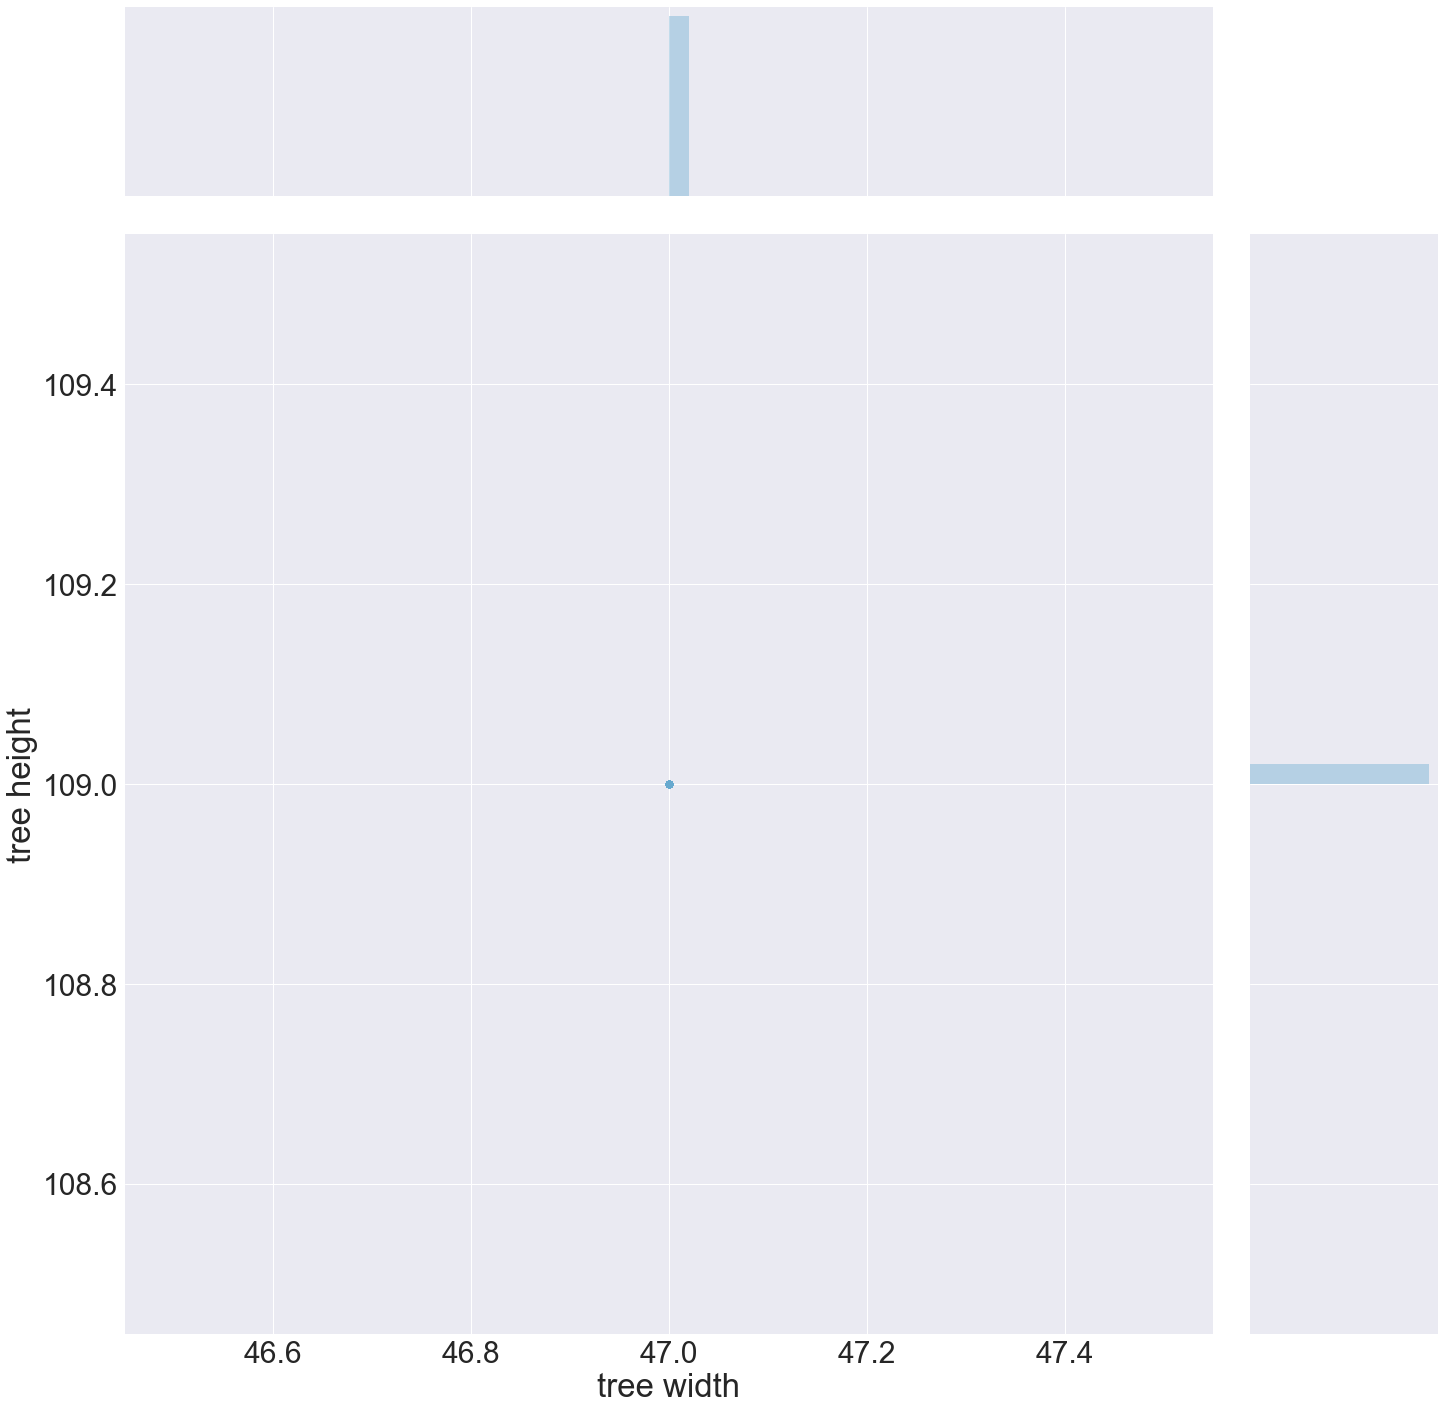

In [10]:
print_jointplots(filenames[0], 3)
print_datainfo(filenames[0])

## RANDOM

C:\Users\wmpk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wmpk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1\_RAND.in
\\
Options count: 65536
\\\\
\textbf{Widths:}
\\
min: 7
\\
max: 511
\\
mean: 259.78
\\
variance: 21293.52
\\
std: 145.92
\\
skewness: -0.01
\\
kurtosis: -1.20
\\\\
\textbf{Heights:}
\\
min: 13
\\
max: 1201
\\
mean: 606.26
\\
variance: 120065.68
\\
std: 346.50
\\
skewness: 0.00
\\
kurtosis: -1.20


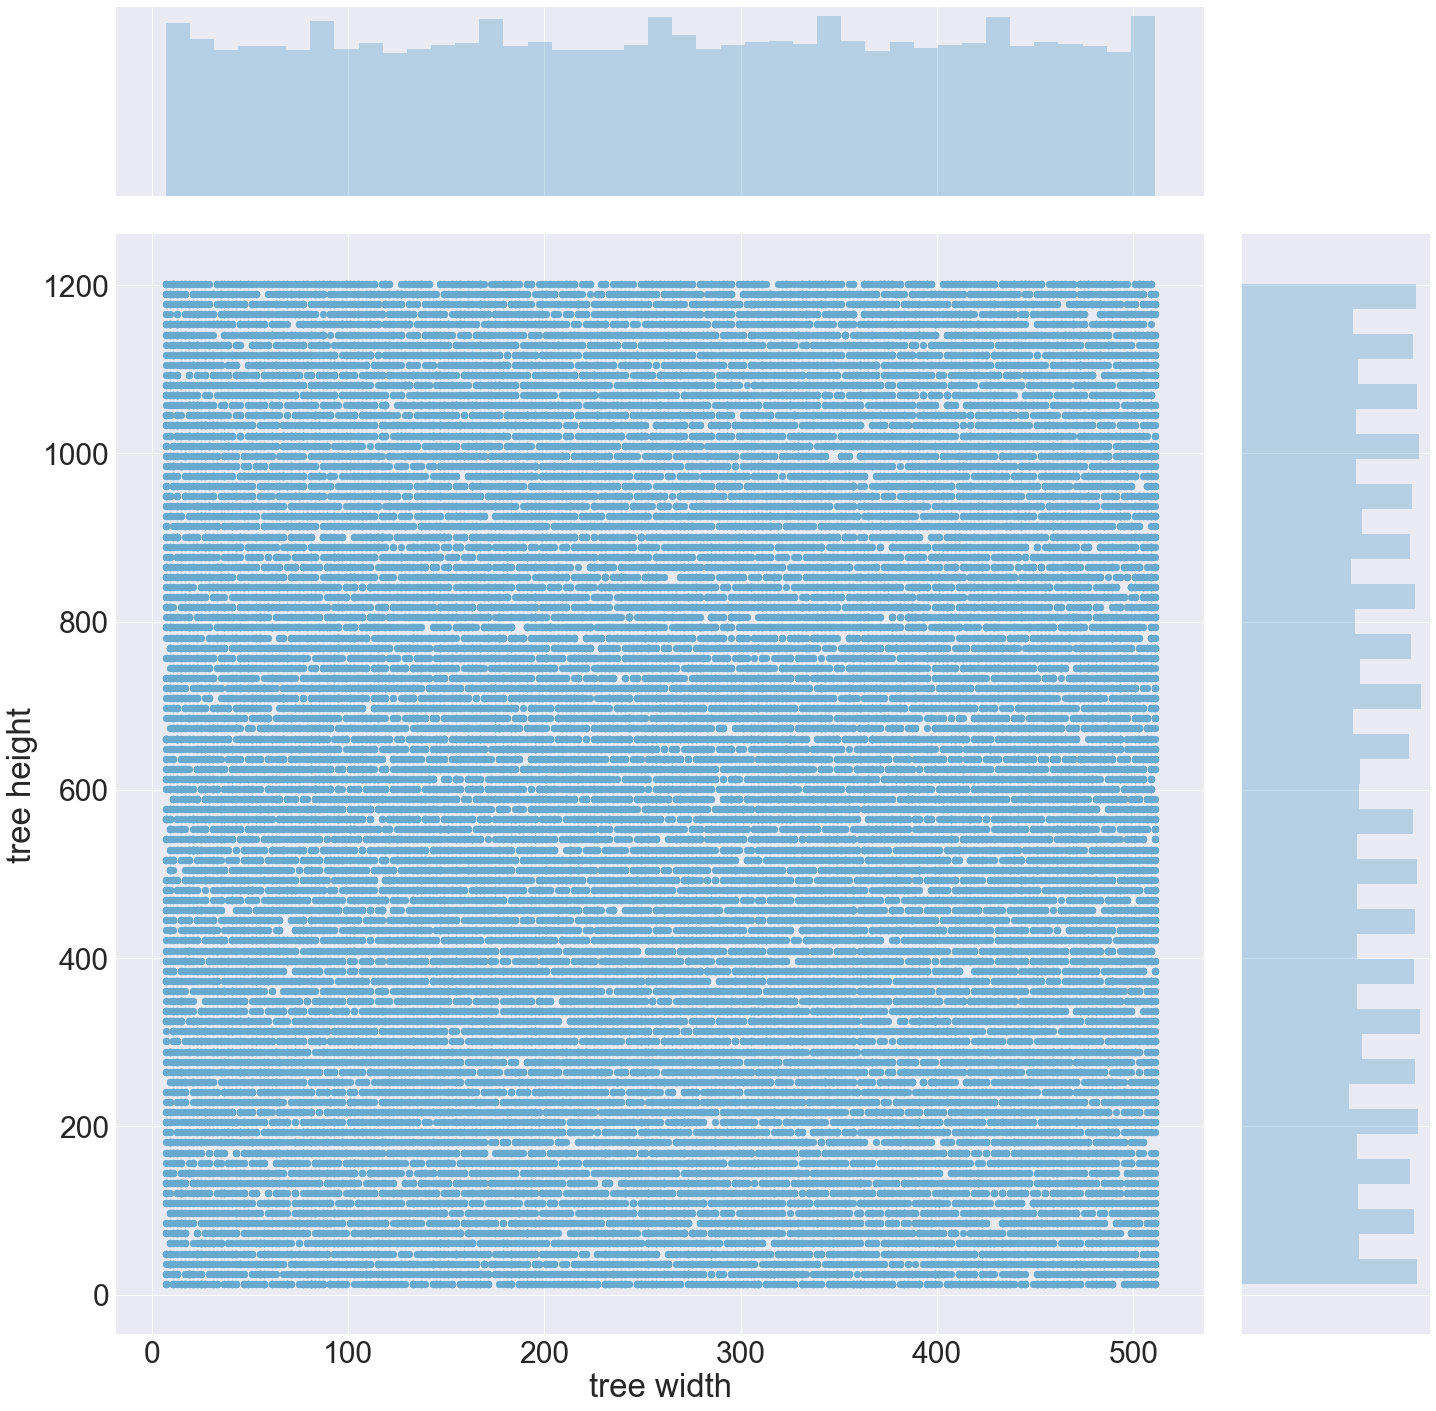

In [11]:
print_jointplots(filenames[1], 3)
print_datainfo(filenames[1])

## RANDOM with constant heights

C:\Users\wmpk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wmpk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


2\_RANDCONSTHEIGHT.in
\\
Options count: 65536
\\\\
\textbf{Widths:}
\\
min: 7
\\
max: 511
\\
mean: 258.52
\\
variance: 21358.88
\\
std: 146.15
\\
skewness: -0.00
\\
kurtosis: -1.20
\\\\
\textbf{Heights:}
\\
min: 109
\\
max: 109
\\
mean: 109.00
\\
variance: 0.00
\\
std: 0.00
\\
skewness: 0.00
\\
kurtosis: -3.00


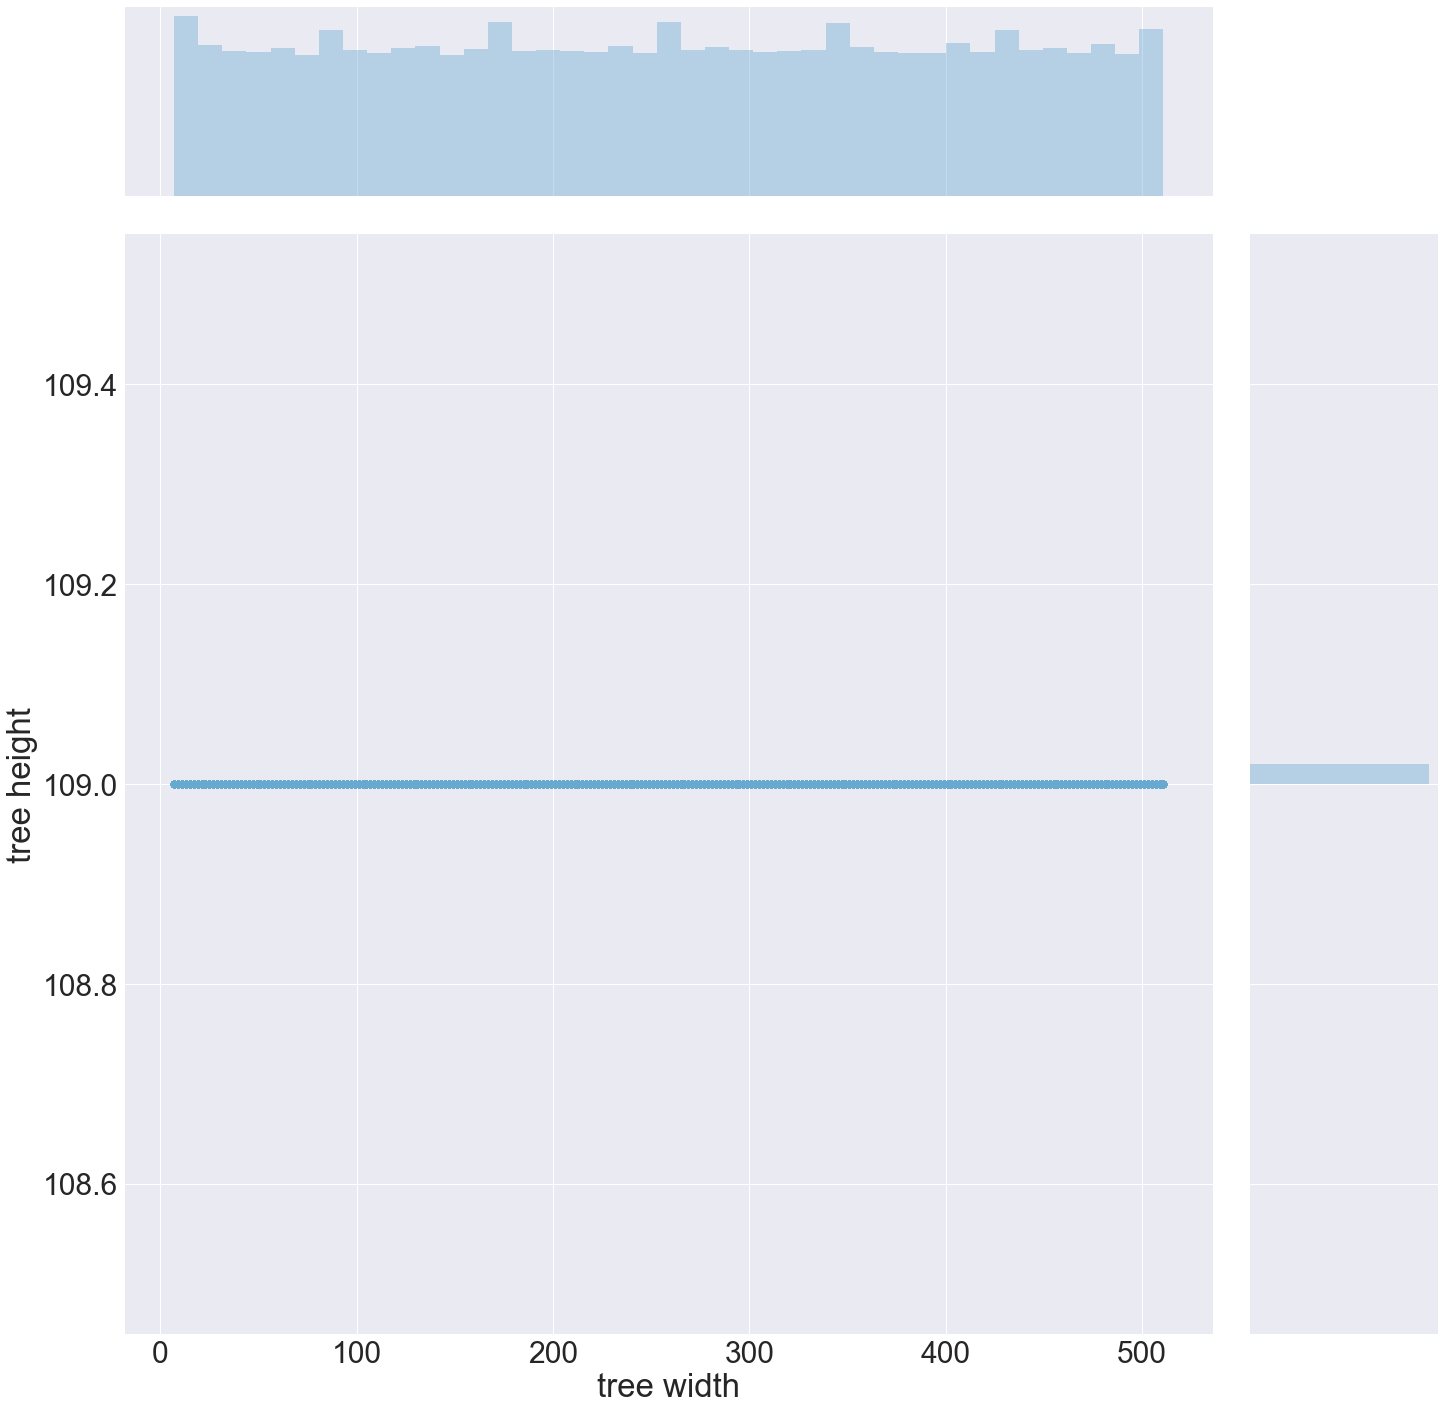

In [12]:
print_jointplots(filenames[2], 4)
print_datainfo(filenames[2])

## RANDOM with constant widths

C:\Users\wmpk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wmpk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


3\_RANDCONSTWIDTH.in
\\
Options count: 65536
\\\\
\textbf{Widths:}
\\
min: 47
\\
max: 47
\\
mean: 47.00
\\
variance: 0.00
\\
std: 0.00
\\
skewness: 0.00
\\
kurtosis: -3.00
\\\\
\textbf{Heights:}
\\
min: 13
\\
max: 1201
\\
mean: 607.04
\\
variance: 119714.09
\\
std: 346.00
\\
skewness: -0.00
\\
kurtosis: -1.20


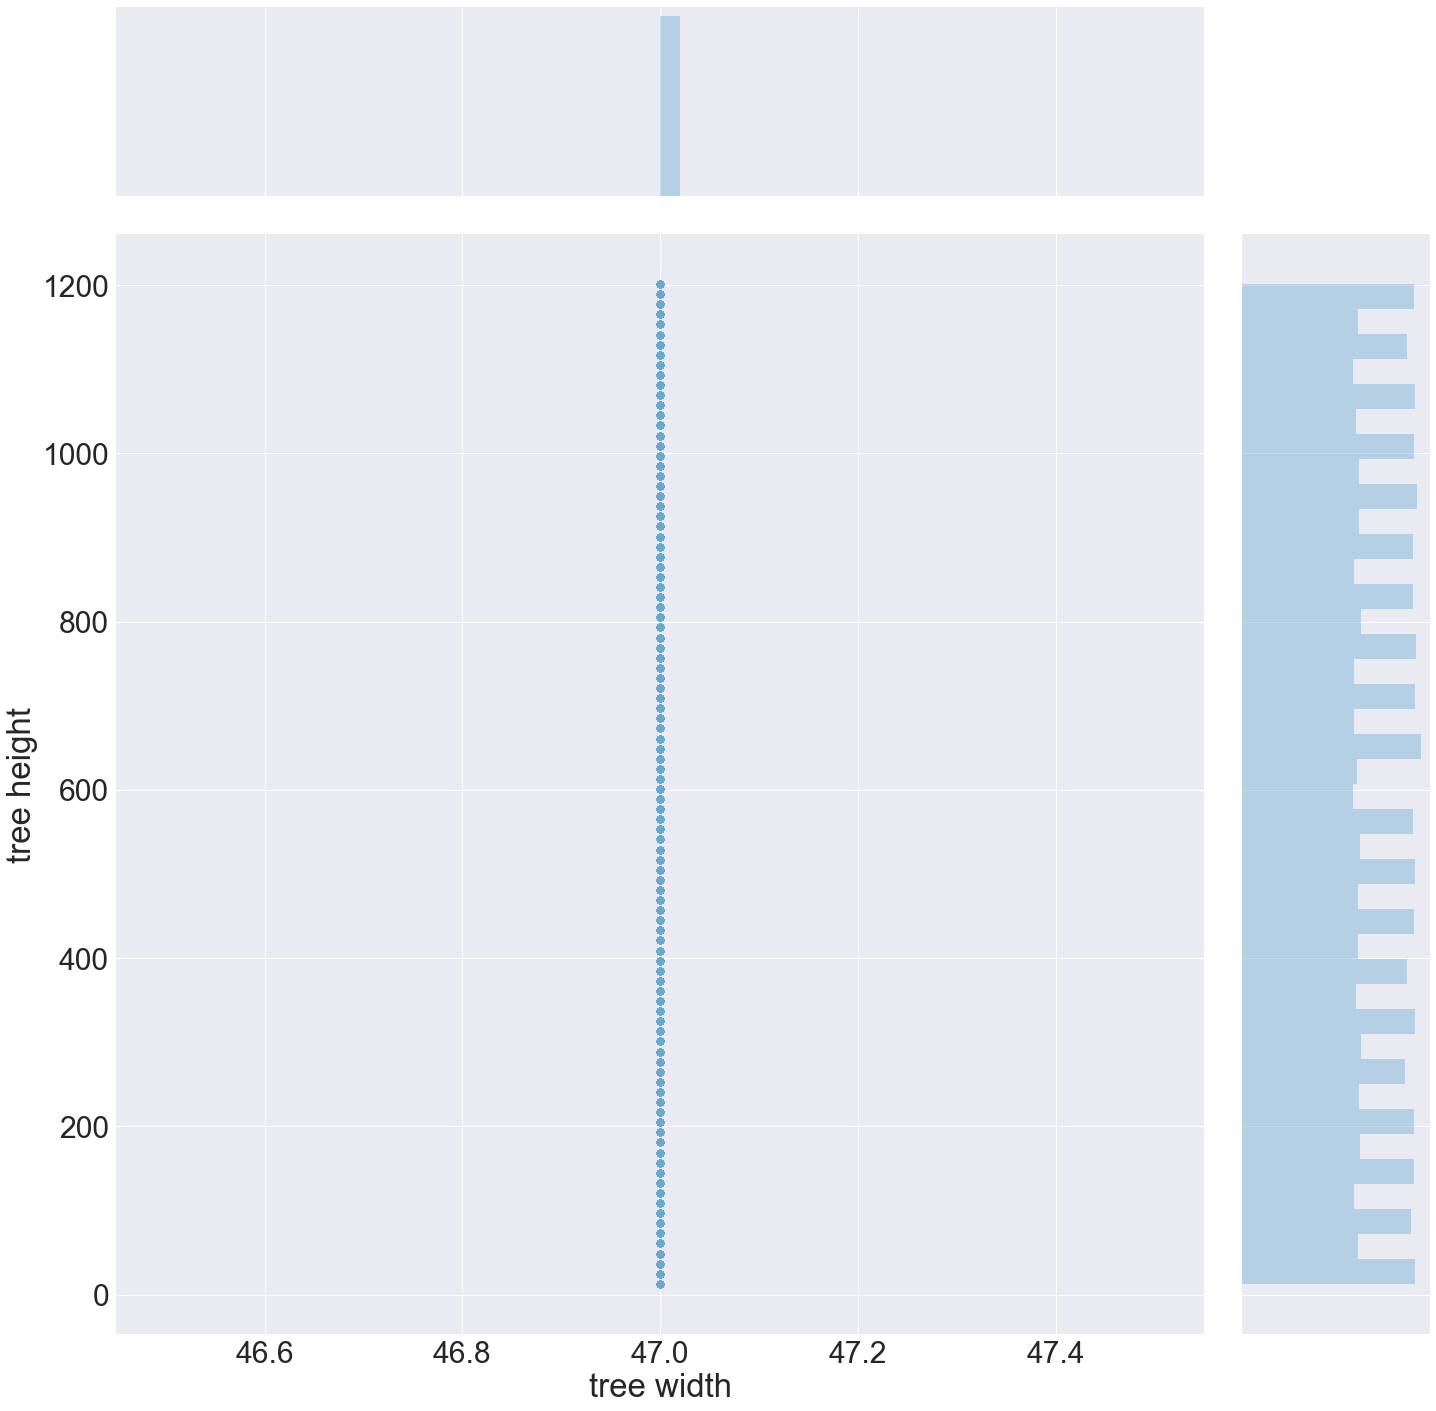

In [13]:
print_jointplots(filenames[3], 4)
print_datainfo(filenames[3])

## SKEWED

C:\Users\wmpk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wmpk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


4\_SKEWED.in
\\
Options count: 65536
\\\\
\textbf{Widths:}
\\
min: 7
\\
max: 511
\\
mean: 60.90
\\
variance: 2490.82
\\
std: 49.91
\\
skewness: 5.19
\\
kurtosis: 40.29
\\\\
\textbf{Heights:}
\\
min: 13
\\
max: 1201
\\
mean: 195.35
\\
variance: 17598.95
\\
std: 132.66
\\
skewness: 2.40
\\
kurtosis: 14.07


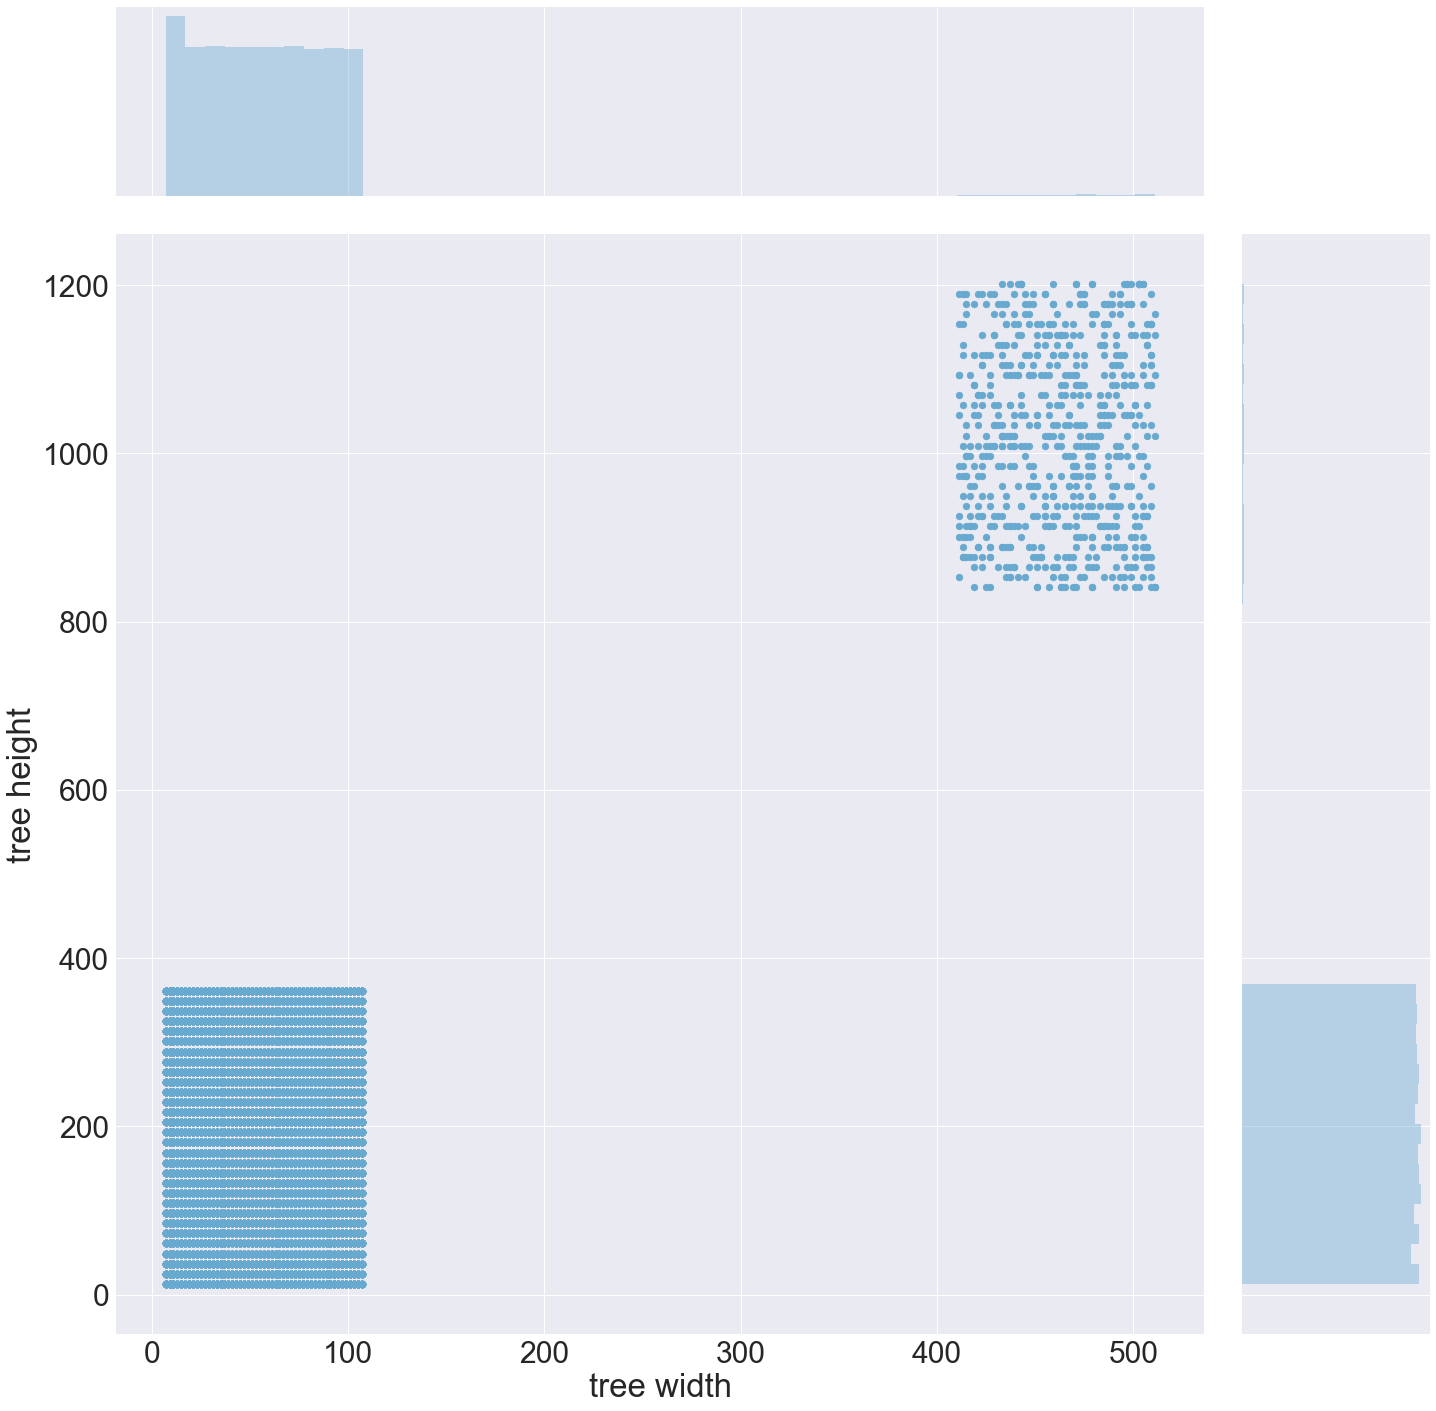

In [14]:
print_jointplots(filenames[4], 3)
print_datainfo(filenames[4])

## SKEWED with constant height

C:\Users\wmpk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wmpk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


5\_SKEWEDCONSTHEIGHT.in
\\
Options count: 65536
\\\\
\textbf{Widths:}
\\
min: 7
\\
max: 107
\\
mean: 57.02
\\
variance: 873.11
\\
std: 29.55
\\
skewness: -0.01
\\
kurtosis: -1.21
\\\\
\textbf{Heights:}
\\
min: 13
\\
max: 1201
\\
mean: 197.43
\\
variance: 20849.10
\\
std: 144.39
\\
skewness: 3.25
\\
kurtosis: 20.85


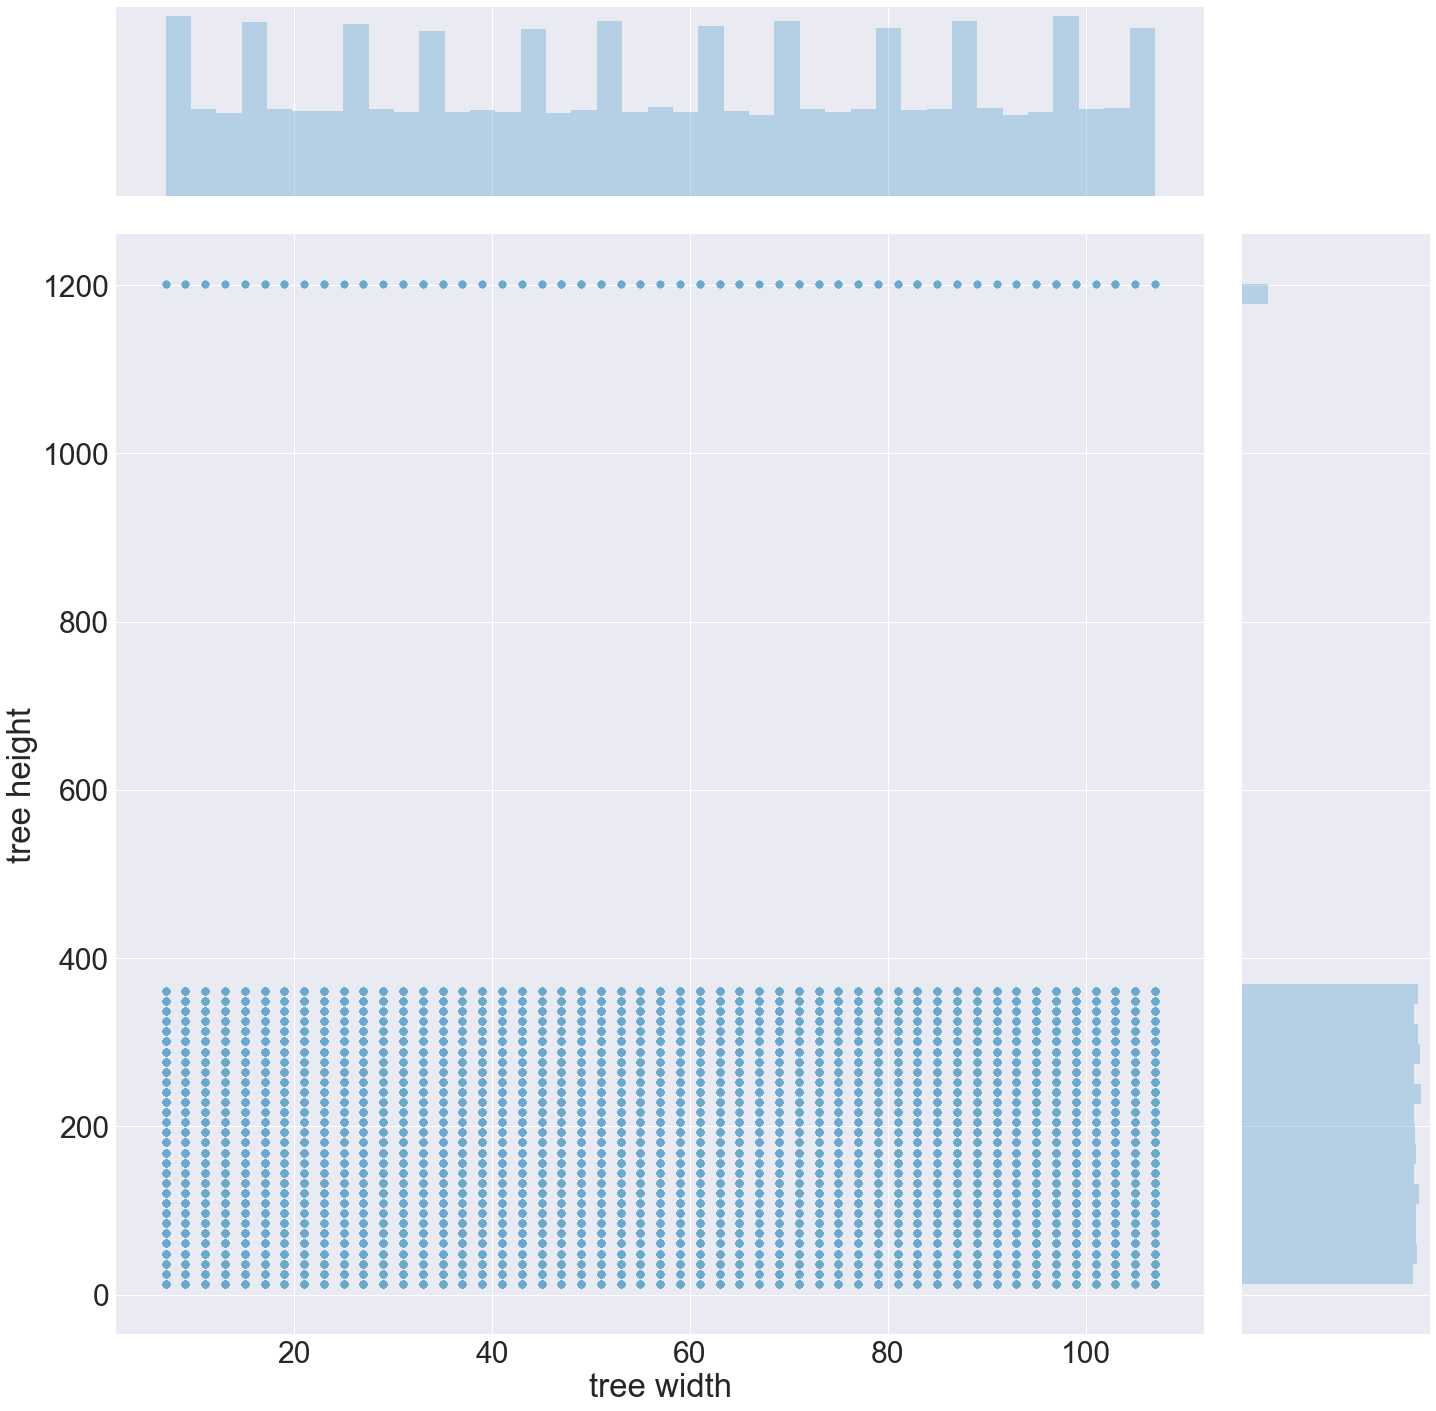

In [15]:
print_jointplots(filenames[5], 4)
print_datainfo(filenames[5])

## SKEWED with constant width

C:\Users\wmpk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wmpk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


6\_SKEWEDCONSTWIDTH.in
\\
Options count: 65536
\\\\
\textbf{Widths:}
\\
min: 7
\\
max: 509
\\
mean: 61.56
\\
variance: 2881.24
\\
std: 53.68
\\
skewness: 5.72
\\
kurtosis: 45.50
\\\\
\textbf{Heights:}
\\
min: 13
\\
max: 361
\\
mean: 186.92
\\
variance: 10793.20
\\
std: 103.89
\\
skewness: -0.00
\\
kurtosis: -1.21


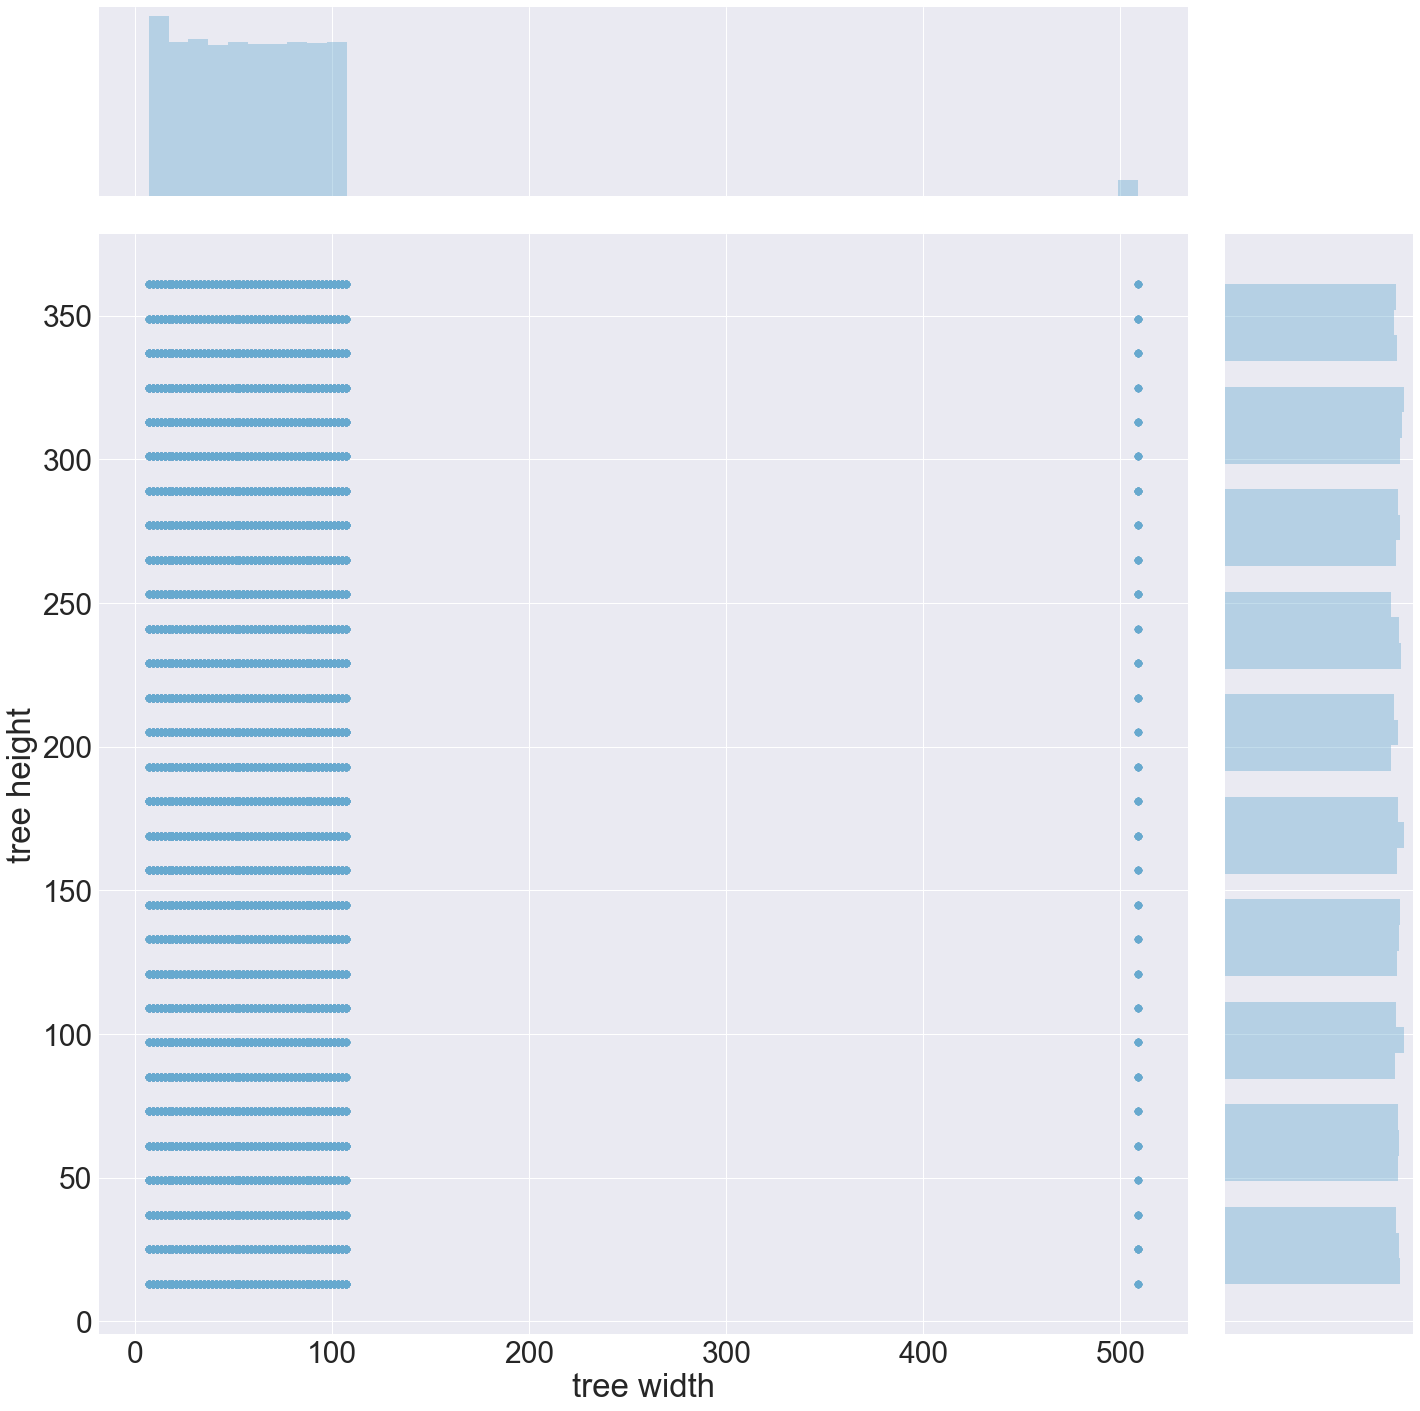

In [16]:
print_jointplots(filenames[6], 4)
print_datainfo(filenames[6])

# DATA SETS BY WOJCIECH

In [17]:
w_filenames_unif = ["rand_h_unif_w_unifdist_100000.in",
"rand_hw_unifdist_100000.in",
"rand_hw_w_256_unifdist_100000.in",
"rand_w_unif_h_unifdist_100000.in",
"skew_h_1_rand_w_unifdist_100000.in",
"skew_h_10_rand_w_unifdist_100000.in",
"skew_hw_1_unifdist_100000.in",
"skew_hw_1_w_256_unifdist_100000.in",
"skew_hw_10_unifdist_100000.in",
"skew_hw_10_w_256_unifdist_100000.in",
"skew_w_1_rand_h_unifdist_100000.in",
"skew_w_10_rand_h_unifdist_100000.in",
"unif_book_hw_100000.in",
"unif_hw_100000.in"]

w_filenames_unif = list(map(lambda f: 'wmp/wmp/unifdist_100000/' + f, w_filenames_unif))

In [18]:
for f in w_filenames_unif:
    print_jointplots(f)
    print_datainfo(f)

TypeError: print_jointplots() missing 1 required positional argument: 'fs'

In [ ]:
w_filenames_norm = [
"rand_h_unif_w_normdist_100000.in",
"rand_hw_normdist_100000.in",
"rand_hw_w_256_normdist_100000.in",
"rand_w_unif_h_normdist_100000.in",
"skew_h_1_rand_w_normdist_100000.in",
"skew_h_10_rand_w_normdist_100000.in",
"skew_hw_1_normdist_100000.in",
"skew_hw_1_w_256_normdist_100000.in",
"skew_hw_10_normdist_100000.in",
"skew_hw_10_w_256_normdist_100000.in",
"skew_w_1_rand_h_normdist_100000.in",
"skew_w_10_rand_h_normdist_100000.in",
"unif_book_hw_100000.in",
"unif_hw_100000.in"
]

w_filenames_norm = list(map(lambda f: 'wmp/wmp/normdist_100000/' + f, w_filenames_norm))

In [ ]:
for f in w_filenames_norm:
    print_jointplots(f, 3)
    print_datainfo(f)

In [ ]:
w_filenames = ["rand_hw_normdist_2500.in",
"skew_hw_1_normdist_2500.in",
"unif_book_hw_2500.in",
"unif_hw_2500.in"]

w_filenames = list(map(lambda f: 'D:/data/wmp/' + f, w_filenames))

In [ ]:
for f in w_filenames:
    print_jointplots(f, 3)
    print_datainfo(f)

In [ ]:
print_jointplots(w_filenames[0], 3)
print_datainfo(w_filenames[0])

In [ ]:
print_jointplots(w_filenames[0], 3)
print_datainfo(w_filenames[0])

In [ ]:
print_jointplots(w_filenames[0], 3)
print_datainfo(w_filenames[0])